In [680]:
blogs_samplesize = 100000
common_word_threshold = 999999 # Discard the top N used words
blog_proportion_threshold = 0.01

In [681]:
!pip install datasets
from datasets import load_dataset
import pandas as pd
import textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [682]:
dataset = load_dataset("blog_authorship_corpus") # todo: make lowercase
df = dataset['train'].to_pandas().sample(blogs_samplesize)
eng_common = pd.read_csv('http://corpus.leeds.ac.uk/frqc/internet-en.num', sep=' ',
                         skiprows=4, header=None, names=['idx', 'freq', 'word']).head(common_word_threshold)
words = pd.read_csv('typos_corrected.txt')

# remove the first 20k most frequently used English words
words = words[~words['word'].isin(eng_common['word'])]

# choose only industries that have at least 1% representation in the data
allowed_jobs = df.groupby('job').text.count()[lambda x: x > len(df.index) * blog_proportion_threshold]

  0%|          | 0/2 [00:00<?, ?it/s]

In [683]:
# remove everything that doesnt meet the min threshold and normalize by downsampling
job_posts = df[df['job'].isin(allowed_jobs.index)].groupby('job').sample(allowed_jobs.min())

job_counts = job_posts['job'].value_counts()

In [684]:
matched_jobs = words['word'].map(lambda x: job_posts[job_posts['text'].str.contains(x)]['job'])

# Necessary because some jobs (e.g. 'student') have more bloggers than others
job_hits_normalized = matched_jobs.explode().value_counts() / job_counts

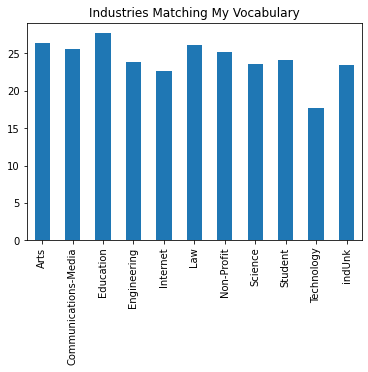

In [685]:
job_hits_normalized.plot(kind='bar', title='Industries Matching My Vocabulary')

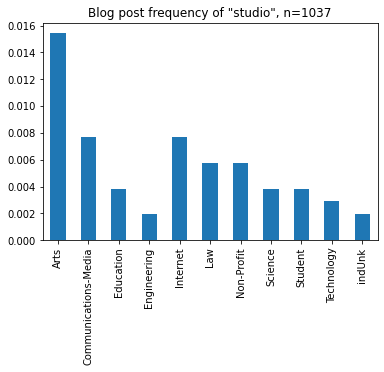

In [737]:
target_word = 'studio'


(job_posts[job_posts['text'].str.contains(target_word)]['job'].explode().value_counts() / job_counts).plot(
    kind='bar', title=f'Blog post frequency of "{target_word}", n={int(job_counts.median())}')